In [26]:
%matplotlib inline

In [27]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd

dataset = pd.read_csv("input/train.csv")

In [28]:
target = dataset[[0]].values.ravel()

In [29]:
target

array([1, 0, 1, ..., 7, 6, 9])

In [30]:
train = dataset.iloc[:, 1:].values

In [31]:
train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [34]:
test = pd.read_csv("input/test.csv").values


In [35]:
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1)

In [36]:
rf.fit(train, target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [37]:
pred = rf.predict(test)

In [38]:
ret = pd.DataFrame(pred, columns=['Label'])
ret

,Label
0,2
1,0
2,9
3,9
4,3
5,7
6,0
7,3
8,0
9,3


In [43]:
image_id = pd.DataFrame(range(1,len(ret) + 1), columns=['ImageId'])

In [46]:
ret_all = pd.concat((image_id, ret), axis=1)

In [48]:
ret_all.to_csv('result.csv', sep=",", index=False)

In [59]:
target = target.astype(np.uint8)
train = np.array(train).reshape((-1, 1, 28, 28)).astype(np.uint8)
test = np.array(test).reshape((-1, 1, 28, 28)).astype(np.uint8)

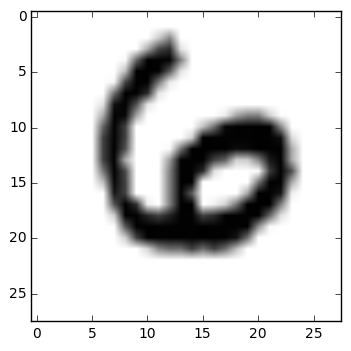

In [64]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

plt.imshow(train[1721][0], cmap=cm.binary)